In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

df=pd.read_csv("stock_data_2021.csv")
df.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits,Symbol
0,AAPL,02/01/2019,38.722500,39.712502,38.557499,39.480000,148158800,37.943260,0.0,0.0,AAPL
1,AAPL,03/01/2019,35.994999,36.430000,35.500000,35.547501,365248800,34.163818,0.0,0.0,AAPL
2,AAPL,04/01/2019,36.132500,37.137501,35.950001,37.064999,234428400,35.622257,0.0,0.0,AAPL
3,AAPL,07/01/2019,37.174999,37.207500,36.474998,36.982498,219111200,35.542973,0.0,0.0,AAPL
4,AAPL,08/01/2019,37.389999,37.955002,37.130001,37.687500,164101200,36.220535,0.0,0.0,AAPL


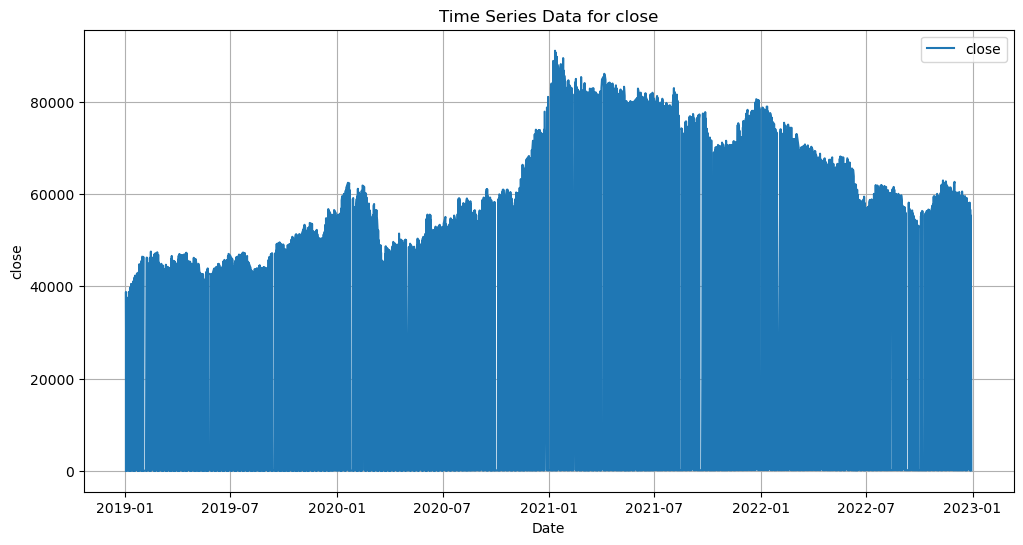

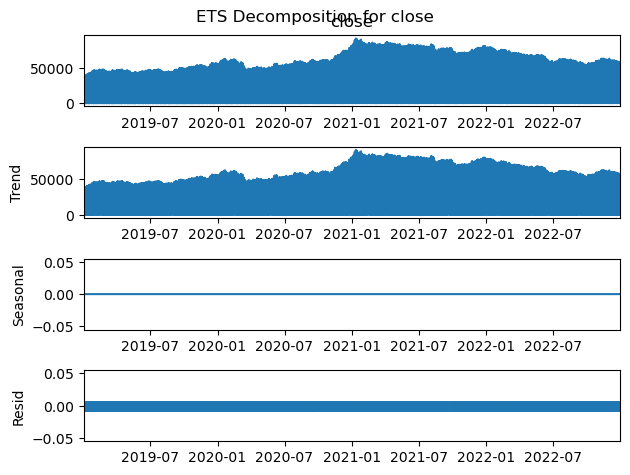

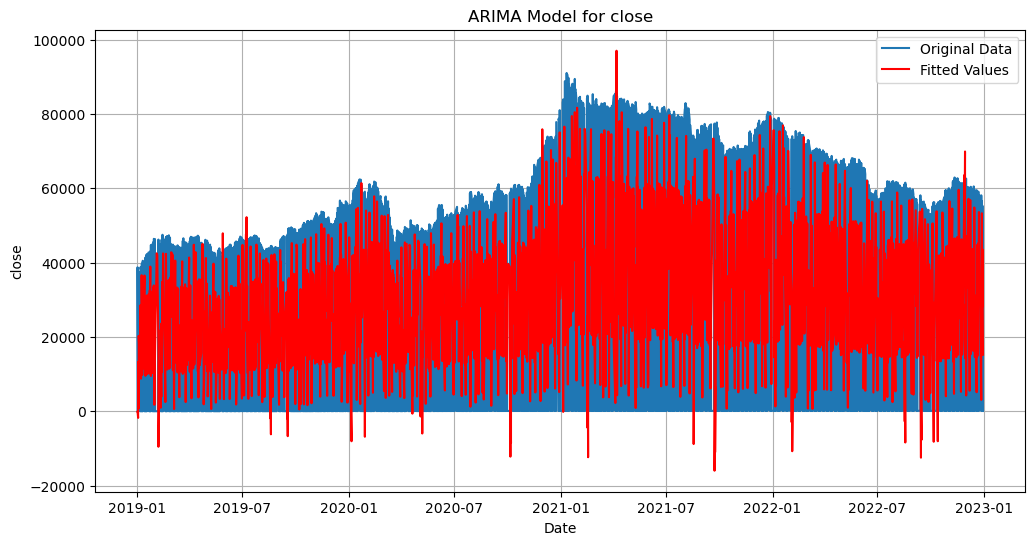

In [15]:


class TimeSeriesAnalysis:
    def __init__(self, data):
        self.data = data
        self.data['Date'] = pd.to_datetime(self.data['date'], format='%d/%m/%Y')
        self.data.set_index('Date', inplace=True)
        self.data.sort_index(ascending=True, inplace=True)
        self.data.drop(['date', 'Symbol'], axis=1, inplace=True)

    def visualize_data(self, column_name):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data[column_name], label=column_name)
        plt.title(f'Time Series Data for {column_name}')
        plt.xlabel('Date')
        plt.ylabel(column_name)
        plt.legend()
        plt.grid()
        plt.show()

    def ets_model(self, column_name):
        decomposition = seasonal_decompose(self.data[column_name], model='additive', period=1)
        decomposition.plot()
        plt.suptitle(f'ETS Decomposition for {column_name}')
        plt.show()

    def arima_model(self, column_name):
        model = sm.tsa.ARIMA(self.data[column_name], order=(5, 1, 0))
        model_fit = model.fit()
        
        # Plotting the time series
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data[column_name], label='Original Data')
        plt.plot(self.data.index, model_fit.fittedvalues, color='red', label='Fitted Values')
        plt.title(f'ARIMA Model for {column_name}')
        plt.xlabel('Date')
        plt.ylabel(column_name)
        plt.legend()
        plt.grid()
        plt.show()

if __name__ == "__main__":
    # Load the data
    data = pd.read_csv('stock_data_2021.csv')  

    # Create an instance of TimeSeriesAnalysis
    ts_analysis = TimeSeriesAnalysis(data)

    # Visualize the data for the 'close' column
    ts_analysis.visualize_data('close')

    # Apply ETS model to the 'close' column
    ts_analysis.ets_model('close')

    # Apply ARIMA model to the 'close' column
    ts_analysis.arima_model('close')
